# Simulated Annealing Applied to the Travelling Salesman Problem

In [9]:
using Random
using Distributions
using Plots
Random.seed!(538);

In [10]:
mutable struct Position{T <: AbstractFloat}
    x::T
    y::T
end

In [11]:
function generate_data(;number_points::Int64)
    coords = []
    for i in 1:number_points
        posx = rand(Uniform(1,10))
        posy = rand(Uniform(1,10))
        push!(coords, Position(posx, posy))
    end
    return coords
end

generate_data (generic function with 1 method)

In [15]:
coord = generate_data(number_points = 10)

10-element Array{Any,1}:
 Position{Float64}(5.734976059762694, 2.3810033901308825)
 Position{Float64}(2.953292223157277, 8.429697340302436)
 Position{Float64}(6.533811472311976, 5.405570507585464)
 Position{Float64}(2.3031127679667756, 5.642963800170648)
 Position{Float64}(8.836476353165388, 3.62184059891963)
 Position{Float64}(4.568401147830635, 5.957627595113292)
 Position{Float64}(8.357279496446923, 1.2401924719062145)
 Position{Float64}(5.979941574987443, 5.364484778537369)
 Position{Float64}(1.2033081245023518, 9.260398395895072)
 Position{Float64}(3.5328805122807045, 9.583110366147084)

In [16]:
function plot_position(; coords)
    
    p = plot([coord[1].x, coord[end].x], [coord[1].y, coord[end].y], color = :skyblue, legend = nothing, linewidth  = 1.5)
    
    for (pos1, pos2) in zip(coord[1:end-1], coord[2:end])
        plot!([pos1.x, pos2.x], [pos1.y, pos2.y], color = :skyblue, linewidth  = 1.5)
    end
    
    for pos1 in coords
        scatter!([pos1.x], [pos1.y], markercolor = :darkgrey, markersize = 8, markerstrokecolor = :darkgrey)
    end
    
    xlabel!("x")
    ylabel!("y")
    
    return p
end 

plot_position (generic function with 1 method)

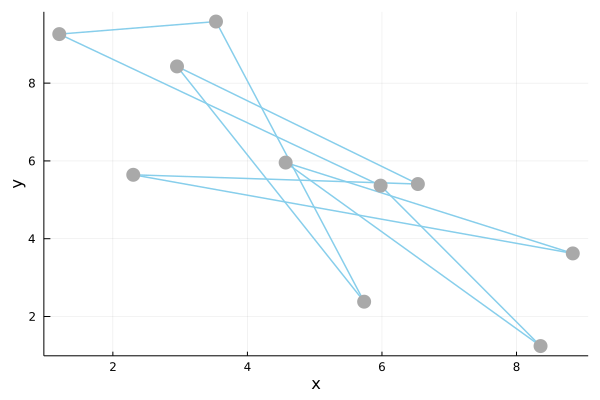

In [17]:
plot_position(coords = coord)

In [18]:
function distance(point1::Position, point2::Position)
    return sqrt((point1.x - point2.x)^2 + (point1.y - point2.y)^2)
end

function total_distance(coord)
    sum(distance.(coord[1:end-1], coord[2:end])) + distance(coord[1], coord[end])
end

total_distance (generic function with 1 method)

In [19]:
function SA(initial_solution; initial_temp, final_temp, markov_len, cooling)
    
    @assert initial_temp > final_temp "initial temperature must be lower than finak temperature"
    
    m = length(initial_solution)
    old_cost = total_distance(initial_solution)
    
    new_route = copy(initial_solution)
    
    temp_hist = []
    push!(temp_hist, initial_temp)
    
    cost_hist = []
    push!(cost_hist, old_cost)
    
    T = initial_temp
    
    while T >= final_temp
        
        for i in 1:markov_len

            # random swap between points
            swap_pos1, swap_pos2 = rand(2:m, 2)
            temp = new_route[swap_pos1]
            new_route[swap_pos1] = new_route[swap_pos2]
            new_route[swap_pos2] = temp
            new_cost = total_distance(new_route)

            δ = new_cost - old_cost
            
            if δ < 0
                old_cost = new_cost
            else
                u = rand()
                if u < exp(-δ / T)
                    old_cost = new_cost
                else
                    temp = new_route[swap_pos1]
                    new_route[swap_pos1] = new_route[swap_pos2]
                    new_route[swap_pos2] = temp
                end
            end

        end
        
        T = cooling * T
        push!(temp_hist, T)
        
    end
    
    return new_route, temp_hist, cost_hist
    
end

SA (generic function with 1 method)

In [20]:
new_route, temp_hist, cost_hist = SA(coord, initial_temp = 24000, final_temp = 1, markov_len = 500, cooling = 0.99)

(Any[Position{Float64}(5.734976059762694, 2.3810033901308825), Position{Float64}(8.836476353165388, 3.62184059891963), Position{Float64}(8.357279496446923, 1.2401924719062145), Position{Float64}(5.979941574987443, 5.364484778537369), Position{Float64}(6.533811472311976, 5.405570507585464), Position{Float64}(2.3031127679667756, 5.642963800170648), Position{Float64}(3.5328805122807045, 9.583110366147084), Position{Float64}(1.2033081245023518, 9.260398395895072), Position{Float64}(2.953292223157277, 8.429697340302436), Position{Float64}(4.568401147830635, 5.957627595113292)], Any[24000, 23760.0, 23522.4, 23287.176, 23054.304239999998, 22823.761197599997, 22595.523585623996, 22369.568349767756, 22145.87266627008, 21924.413939607377  …  1.089506602056182, 1.0786115360356203, 1.0678254206752642, 1.0571471664685115, 1.0465756948038263, 1.036109937855788, 1.0257488384772302, 1.0154913500924578, 1.0053364365915332, 0.9952830722256178], Any[54.14404751970931])

In [21]:
length(temp_hist)

1005

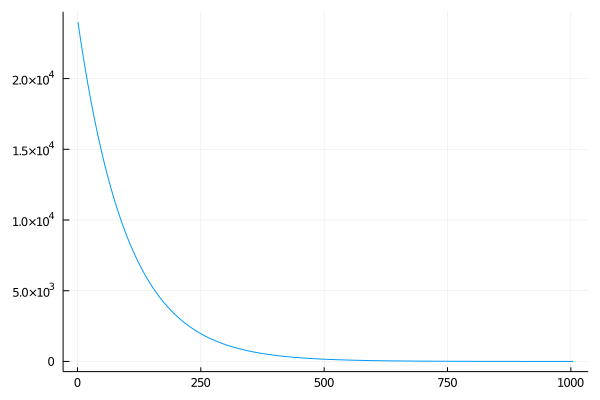

In [22]:
plot(collect(1:length(temp_hist)), temp_hist, legend = nothing)

In [199]:
plot(collect(1:length(cost_hist)), cost_hist, legend = nothing)

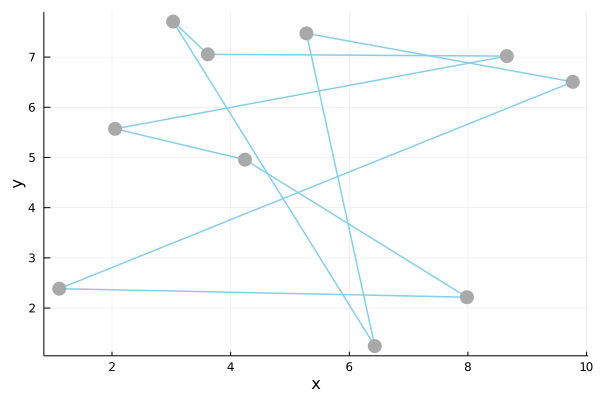

In [200]:
plot_position(coords = new_route)

In [161]:
rand()

0.006576529780133011

In [182]:
exp(-10/1)

4.539992976248485e-5